- In general, we want D << N

```
N # # #  
N # # #  
N # # #  
N # # #  
N # I #           N # # # # # # # # # # # #  
N # D #           N # # # # # # # # # # # #  
N # E #           N # N O T # I D E A L # #   
N # A #           N # # # # # # # # # # # #  
N # L #           D D D D D D D D D D D D D
N # # #  
N # # #  
N # # #  
D D D D 
```

- Goal: Select a small number of important features that predict the trend
- Don't let the noise influence the output
- This is called sparsity - few weights are non-zero, most will be 0
- Achieved by L1 regularization

$ J_{ridge} = - \sum_{n=1}^N (t_n log y_n - (1 - t_n) log (1 - y_n)) + \lambda \vert \vert w \vert \vert_2 ^ 2$  

$ J_{lasso} = - \sum_{n=1}^N (t_n log y_n - (1 - t_n) log (1 - y_n)) + \lambda \vert \vert w \vert \vert_1 $

- It is also a MAP estimation of w, with the prior being a Laplace distribution $$p(w) = \frac{\lambda}{2} exp(- \lambda \vert w \vert)$$

Taking the derivative of $J_{lasso}$:

$\frac{\partial J}{\partial w} = X^T (Y -T) + \lambda sign(w)$  
TODO: Derive this

$sign(x) =$ 1 if x > 0, -1, if x < 0, 0 if x = 0. Since its inverse is not a function, we cannot solve for w analytically.

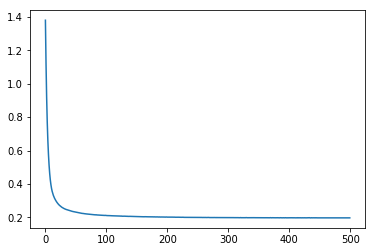

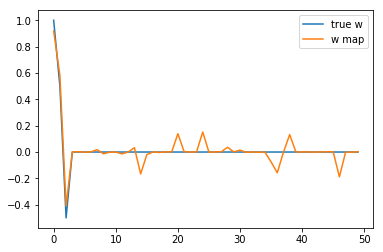

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

N = 50
D = 50

X = (np.random.random((N, D)) - 0.5) * 10

true_w = np.array([1, 0.5, -0.5] + [0] * (D - 3))

Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N) * 0.5))

costs = []

w= np.random.randn(D) / np.sqrt(D)

learning_rate = 0.001

l1 = 2.0

for t in range(500):
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w -= learning_rate * (X.T.dot(delta) + l1 * np.sign(w))
    
    cost = -(Y * np.log(Yhat) +
             (1 - Y) * np.log(1 - Yhat)).mean() + l1 * np.abs(w).mean()
    costs.append(cost)
    
plt.plot(costs)
plt.show()

plt.plot(true_w, label='true w')
plt.plot(w, label='w map')
plt.legend()

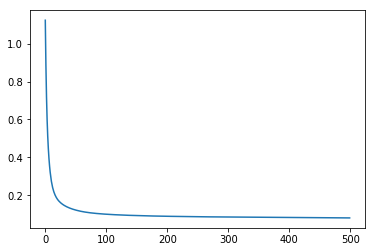

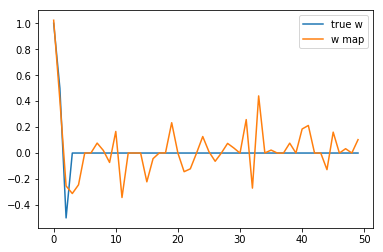

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

N = 50
D = 50

X = (np.random.random((N, D)) - 0.5) * 10

true_w = np.array([1, 0.5, -0.5] + [0] * (D - 3))

Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N) * 0.5))

costs = []

w= np.random.randn(D) / np.sqrt(D)

learning_rate = 0.001

l1 = 0.5

for t in range(500):
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w -= learning_rate * (X.T.dot(delta) + l1 * np.sign(w))
    
    cost = -(Y * np.log(Yhat) +
             (1 - Y) * np.log(1 - Yhat)).mean() + l1 * np.abs(w).mean()
    costs.append(cost)
    
plt.plot(costs)
plt.show()

plt.plot(true_w, label='true w')
plt.plot(w, label='w map')
plt.legend()

In [ ]:
# Take a moment to understand what's going on in the plots above.
# What's the y axis in the second graph?
# It is the weights. So don't be fooled by the fact the points are
#    connected, or if it feels like the y-axis is number of iterations.
# It's actually the value of weight_x.